# NOTEBOOK 2B - Visualise the Feature Selection
### This script plots the outputs of the optimisation algorithm.

In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib.ticker import AutoMinorLocator
from IPython.display import Image
from IPython.display import display

## STEP 1 - Open Optimisation Output
### Three columns: 
### Training period (0-1600) normalised-RMSE (CV - cross validaiton mode)
### Test period (1601-1850) N-RMSE
### Solution list (list of lag times and selections by variable)
### ! Can be opened even while the algorithm is still running !

In [10]:
print ("Training Score (CV - cross-validation) , Test Score , Solution array")
name='Output/optimisation_output.csv'
sol_file_av = pd.read_csv(name, index_col=None, sep=' ', header=0)    
num_sims=sol_file_av.shape[0]
print (sol_file_av)
print ("Number of optimisation evaluations: ", sol_file_av.shape[0])

Training Score (CV - cross-validation) , Test Score , Solution array
           CV      Test                                                Sol
0    1.049073  1.060173  [6 6 7 5 4 3 2 2 4 1 3 2 6 6 7 6 1 1 2 1 2 2 3...
1    1.040467  1.009256  [2 7 2 6 3 7 2 2 7 5 7 1 6 1 2 1 7 1 6 4 4 5 7...
2    1.044686  1.019667  [1 1 5 5 3 5 2 1 3 2 7 3 1 7 3 5 7 5 7 3 3 7 3...
3    1.064599  1.033028  [6 4 1 2 4 4 3 2 5 6 2 6 2 1 6 5 4 2 6 3 6 6 5...
4    1.035737  1.004774  [1 4 2 4 3 3 2 1 2 5 7 6 7 1 3 2 4 7 4 6 7 5 5...
..        ...       ...                                                ...
99   1.044012  1.009626  [6. 7. 1. 6. 5. 4. 5. 1. 1. 1. 1. 4. 6. 2. 6. ...
100  1.053084  1.017246  [2. 2. 1. 7. 1. 7. 2. 1. 1. 5. 2. 1. 6. 6. 5. ...
101  1.045354  1.012060  [4. 3. 1. 5. 3. 1. 4. 1. 2. 5. 6. 2. 2. 6. 5. ...
102  1.060614  1.023125  [4. 2. 6. 6. 1. 5. 5. 5. 7. 4. 1. 5. 7. 7. 3. ...
103  1.038289  1.039941  [1 7 6 2 6 3 7 6 1 7 1 7 5 6 6 1 4 5 1 5 6 1 4...

[104 rows x 3 columns]
Number 

## STEP 2 - Plot Progress of Skill Optimisation

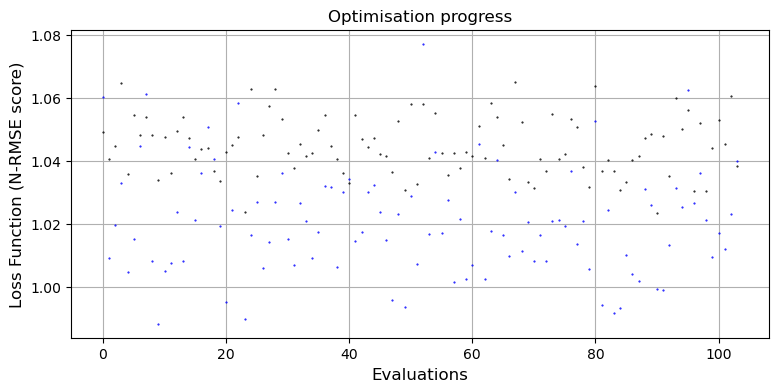

In [11]:
plt.figure(figsize=(9,4))
plt.plot(sol_file_av.index,sol_file_av['Test'],'b',marker='o',ms=0.5,lw=0)
plt.plot(sol_file_av.index,sol_file_av['CV'],'k',marker='o',ms=0.5,lw=0)

plt.title("Optimisation progress")
plt.xlabel('Evaluations',fontsize=12)

plt.ylabel('Loss Function (N-RMSE score)',fontsize=12)
#plt.ylim([0,1])
plt.grid()

plt.show()

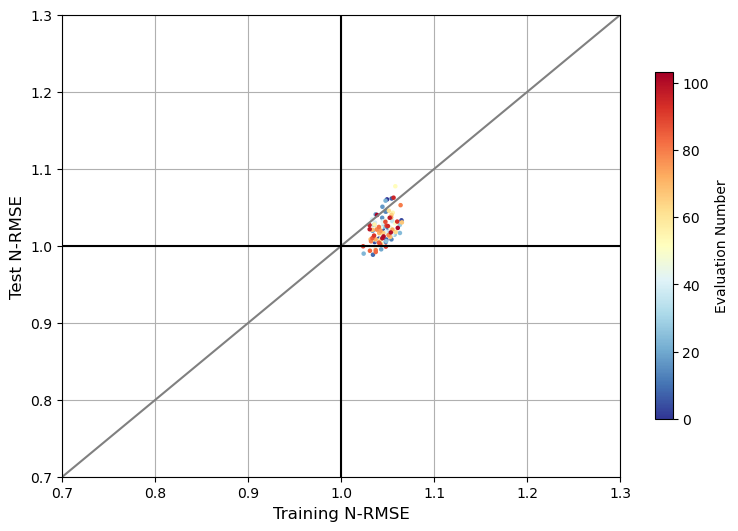

In [12]:
plt.figure(figsize=(9,6))
plt.scatter(sol_file_av['CV'],sol_file_av['Test'],c=range(num_sims),s=5,alpha=1,cmap='RdYlBu_r')

cbar=plt.colorbar(label="Evaluation Number",shrink=0.75)
cbar.ax.tick_params(labelsize=10)

plt.plot([0,2],[0,2],ls='-', color='grey')
plt.axhline(y=1,ls='-',lw=1.5,color='black')
plt.axvline(x=1,ls='-',lw=1.5,color='black')

plt.xlabel("Training N-RMSE",fontsize=12)
plt.ylabel("Test N-RMSE",fontsize=12)
plt.xlim([0.7,1.3])
plt.ylim([0.7,1.3])

plt.grid()
plt.show()

## STEP 3. Plot Optimal Solution.
### Use the optimal solution chart and cluster maps below to explore the predictors of heatwaves for your target location. 

In [13]:
array_best = np.fromstring(sol_file_av.Sol[sol_file_av.sort_values(by=['CV'],ascending=True).index[0]].replace('[', '').replace(']', '').replace('\n', ''), dtype=float, sep=' ')
split=int(array_best.shape[0]/3)

pred_dataframe = pd.read_csv('../DATA/Predictors_dataset_past2k_weekly-smallsample.csv', index_col=0)
column_names = pred_dataframe.columns.tolist()
print (column_names)

['mslpEurope_cluster1', 'mslpEurope_cluster2', 'mslpEurope_cluster3', 'mslpEurope_cluster4', 'mslpEurope_cluster5', 'smEurope_cluster1', 'smEurope_cluster2', 'smEurope_cluster3', 'smEurope_cluster4', 'smEurope_cluster5', 'sstWorld_cluster1', 'sstWorld_cluster2', 'sstWorld_cluster3', 'sstWorld_cluster4', 'sstWorld_cluster5', 'sstMediterranean_cluster1', 'sstMediterranean_cluster2', 'sstMediterranean_cluster3', 'sstMediterranean_cluster4', 'sstMediterranean_cluster5', 'z500Europe_cluster1', 'z500Europe_cluster2', 'z500Europe_cluster3', 'z500Europe_cluster4', 'z500Europe_cluster5', 'olrTropics_cluster1', 'olrTropics_cluster2', 'olrTropics_cluster3', 'olrTropics_cluster4', 'olrTropics_cluster5', 'tmaxEurope_cluster1', 'tmaxEurope_cluster2', 'tmaxEurope_cluster3', 'tmaxEurope_cluster4', 'tmaxEurope_cluster5', 'data_CO2', 'weekofyear']


### Display the features corresponding to the best solution

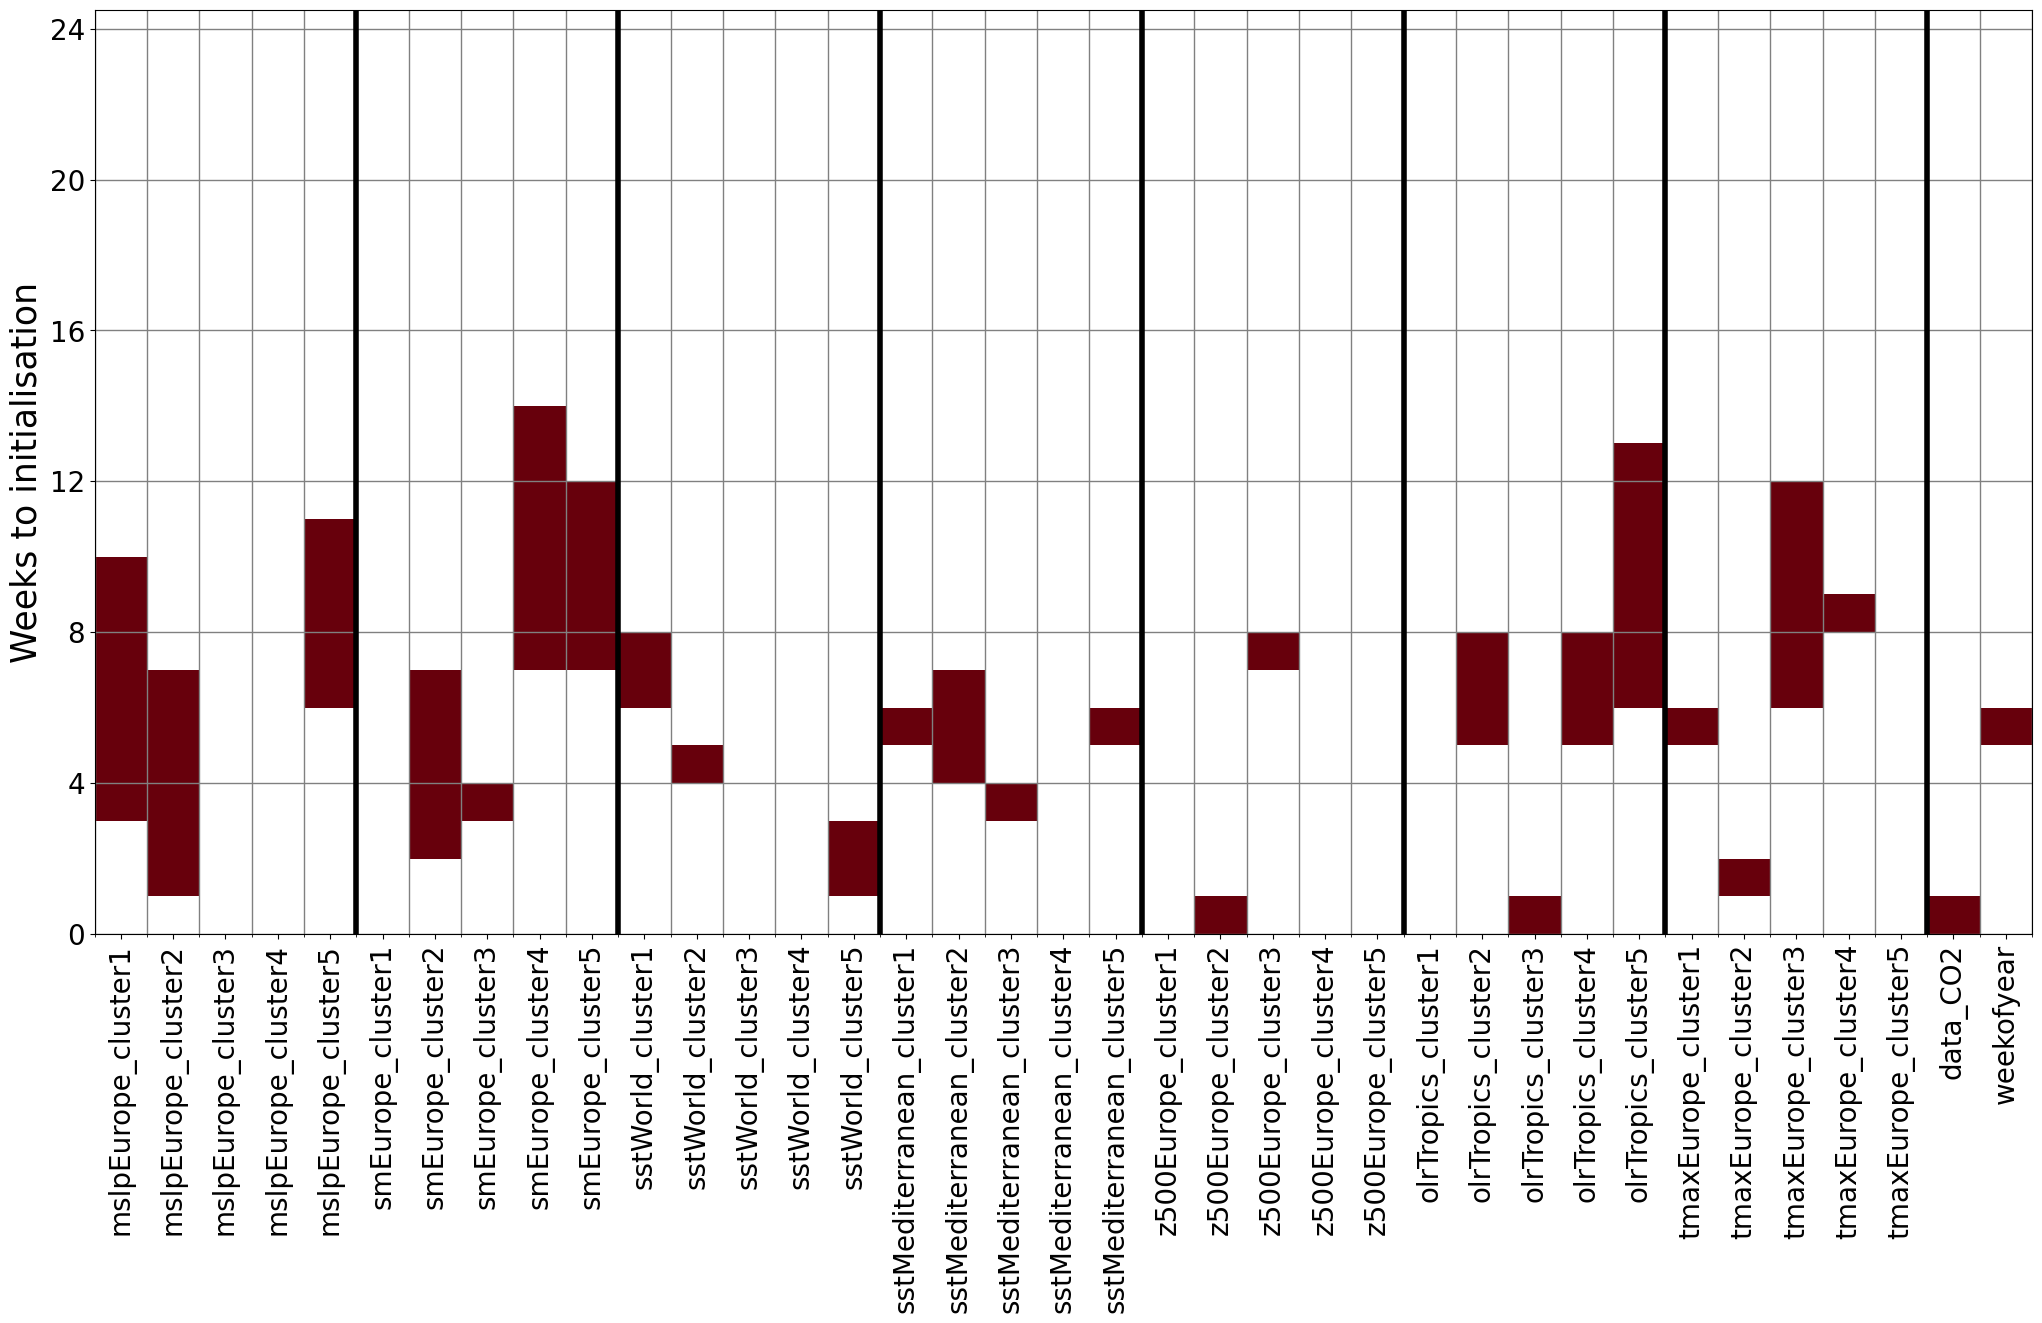

Percentage of total predictors selected:  8.333333333333334


In [14]:
def create_board(n_rows, n_cols, final_sequence, sequence_length, feat_sel):
    board = np.zeros((n_rows, n_cols))
    
    for i in range(n_cols):
        start_index = int(final_sequence[i]) 
        end_index = int(final_sequence[i])  + int(sequence_length[i])
        if feat_sel[i] != 0:
            board[start_index:end_index, i] = 1
    
    return board

def plot_board(board, column_names,show):
    plt.figure(figsize=(25, 12))

    upper = mpl.cm.Reds(np.arange(256))
    lower = mpl.cm.Greys((int(256/4),4))
    for i in range(3):
      lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])
    cmap = np.vstack(( lower, upper ))
    cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])
    
    plt.imshow(board, cmap=cmap, origin='lower',aspect='auto')
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90,fontsize=11)
    plt.yticks(np.arange(0,board.shape[0],1)-0.5,np.arange(0,board.shape[0],1))
    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90, fontsize=20)
    plt.yticks(np.arange(0,25,4) - 0.5, range(0,25,4),fontsize=20)

    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.gca().xaxis.grid(which='minor', color='gray', linewidth=1)
    plt.gca().yaxis.grid(which='major', color='gray', linewidth=1)

    plt.ylabel('Weeks to initialisation', fontsize=25)
    plt.ylim([-0.5,24])
    plt.xlim([-0.5,35.5])

    for i in range(0,int(len(column_names)/5),1):
        plt.axvline(x=4.5+(5*i),color='black',lw='4')

    
    plt.show()
        
sequence_length_best = array_best[0:split]
final_sequence_best = array_best[split:split*2]
feat_sel_best = array_best[split*2:]
n_rows = int((sequence_length_best + final_sequence_best).max())+10
n_cols = split
board_best = create_board(n_rows, n_cols, final_sequence_best, sequence_length_best, feat_sel_best)

plot_board(board_best, column_names,True)

print ("Percentage of total predictors selected: ", 100.*np.sum(board_best)/(24*len(column_names)))


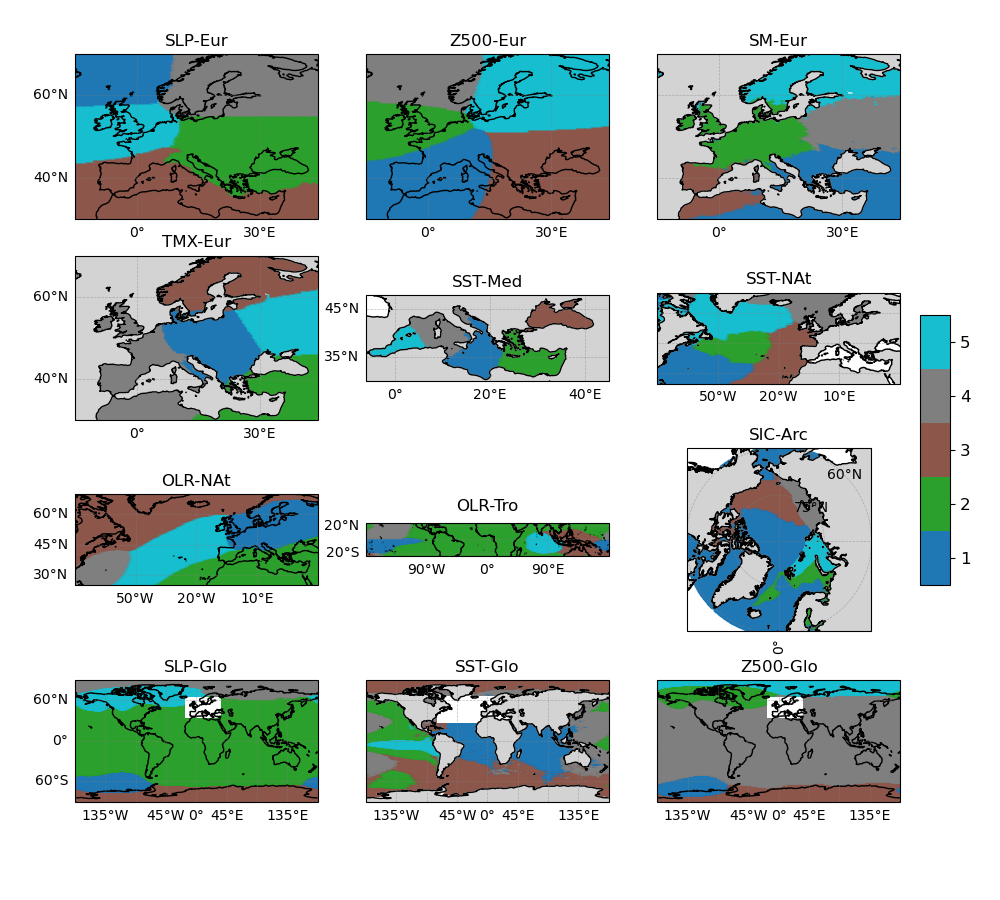

In [15]:
display(Image(filename='../Clusters.png'))